# core

> Fill in a module description here

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#| default_exp data

In [3]:
#| hide
from nbdev.showdoc import *

In [4]:
#| export
import numpy as np

In [5]:
#| export
def generate_mixed_gaussian_data(n_samples, means, covariances, weights):
    """
    Generates samples from a Gaussian Mixture Model.

    Parameters:
        n_samples (int): Total number of samples to generate.
        means (list of arrays): Means of the Gaussian components. Each element is a 1D array.
        covariances (list of arrays): Covariance matrices for the Gaussian components.
        weights (list of floats): Mixing weights for the components. Should sum to 1.

    Returns:
        X (ndarray): Generated sample data.
        y (ndarray): Component labels for each sample.
    """
    n_components = len(means)
    assert len(covariances) == n_components, "Mismatch in number of covariances and means."
    assert len(weights) == n_components, "Mismatch in number of weights and means."
    assert np.isclose(sum(weights), 1.0), "Weights should sum to 1."

    # Determine the number of samples per component
    samples_per_component = np.random.multinomial(n_samples, weights)

    # Generate samples for each component
    X = []
    y = []
    for i, (mean, cov, n) in enumerate(zip(means, covariances, samples_per_component)):
        component_samples = np.random.multivariate_normal(mean, cov, n)
        X.append(component_samples)
        y.extend([i] * n)  # Label each sample with its component index

    # Combine all samples and shuffle
    X = np.vstack(X)
    y = np.array(y)
    shuffle_indices = np.random.permutation(len(X))
    return X[shuffle_indices], y[shuffle_indices]


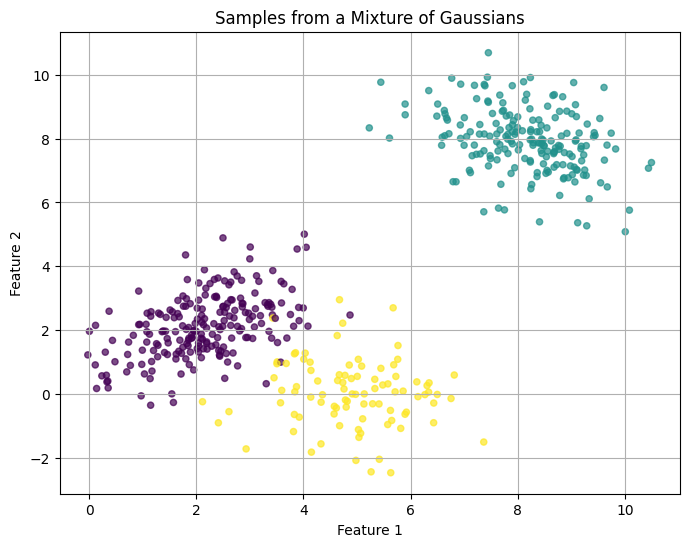

In [6]:
# Parameters for the Gaussian mixture
n_samples = 500
means = [np.array([2, 2]), np.array([8, 8]), np.array([5, 0])]
covariances = [np.array([[1, 0.5], [0.5, 1]]),
               np.array([[1, -0.3], [-0.3, 1]]),
               np.array([[1, 0], [0, 1]])]
weights = [0.4, 0.4, 0.2]  # Mixing proportions

# Generate the data
X, y = generate_mixed_gaussian_data(n_samples, means, covariances, weights)

# Visualize the data
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=20, alpha=0.7)
plt.title("Samples from a Mixture of Gaussians")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()



In [7]:
#| hide
import nbdev; nbdev.nbdev_export()